In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('marathon-data.csv')
df.shape

(37250, 4)

In [3]:
df.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [4]:
df.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [5]:
from datetime import timedelta

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final': convert_time})

data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [6]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [7]:
data['split_sec'] = data['split'].dt.total_seconds()
data['final_sec'] = data['final'].dt.total_seconds()

data['split_min'] = data['split'].dt.total_seconds()/60
data['final_min'] = data['final'].dt.total_seconds()/60
data.head()

,age,gender,split,final,split_sec,final_sec,split_min,final_min
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,65.633333,128.850000
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,66.433333,129.466667
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,66.816667,130.700000
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,66.266667,133.750000
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,66.533333,133.983333


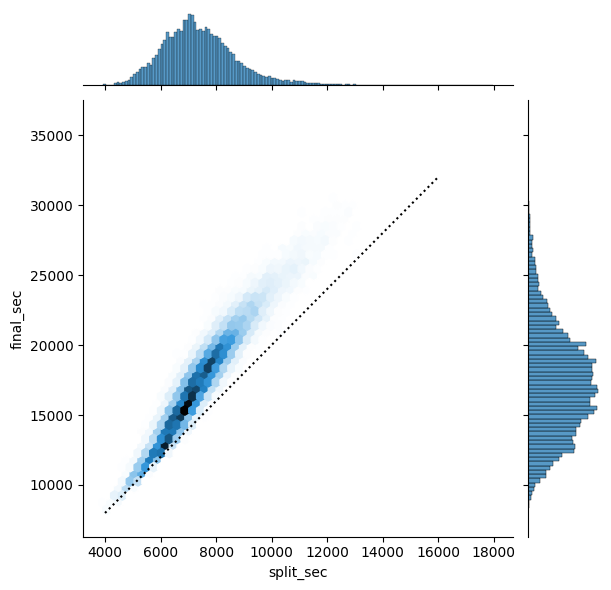

In [8]:
g = sns.jointplot(data=data, x='split_sec', y='final_sec', kind='hex')
g.ax_joint.plot(np.linspace(4000,16000), np.linspace(8000,32000), ':k')

plt.show()

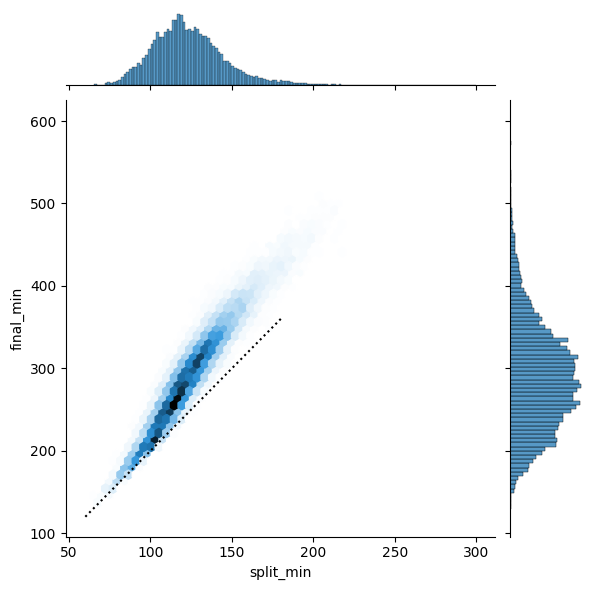

In [9]:
g = sns.jointplot(data=data, x='split_min', y='final_min', kind='hex')
g.ax_joint.plot(np.linspace(60,180), np.linspace(120,360), ':k')

plt.show()

In [10]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

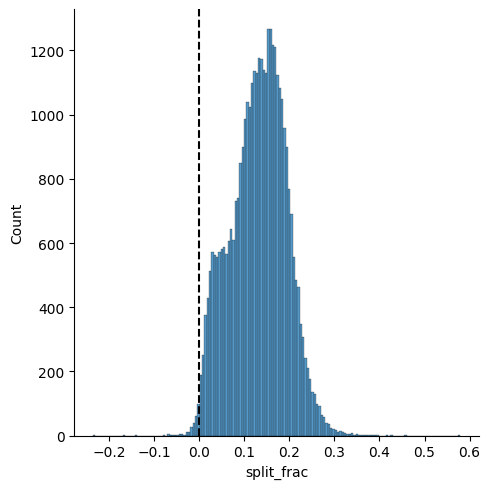

In [11]:
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle='--')
plt.show()

In [12]:
sum(data.split_frac < 0)

251

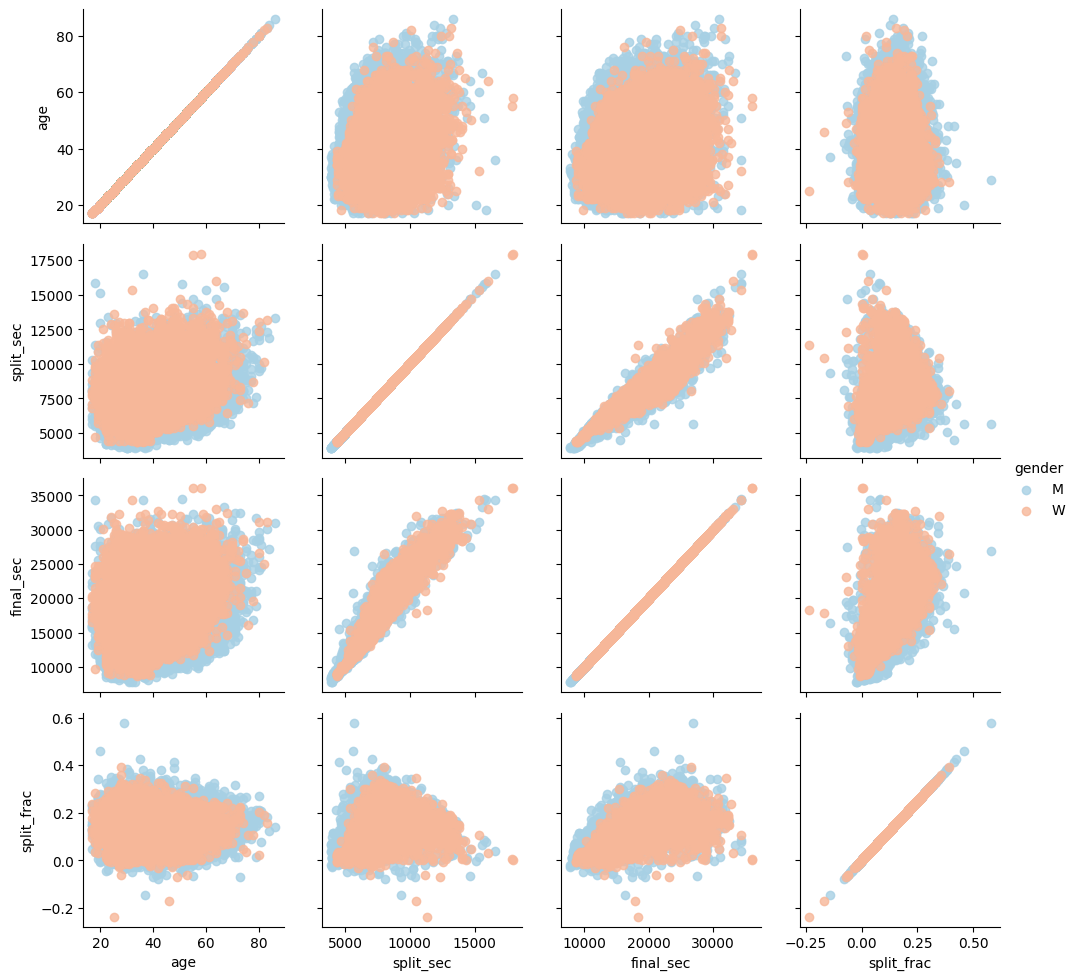

In [13]:
g = sns.PairGrid(data, vars=['age','split_sec','final_sec','split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()
plt.show()

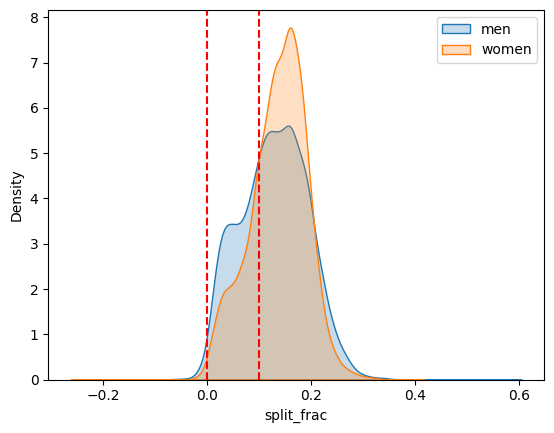

In [35]:
sns.kdeplot(data.split_frac[data.gender=="M"], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=="W"], label='women', fill=True)
plt.xlabel('split_frac')
plt.legend()
plt.axvline(0, linestyle='--', color='r')
plt.axvline(0.1, linestyle='--', color='r')
plt.show()

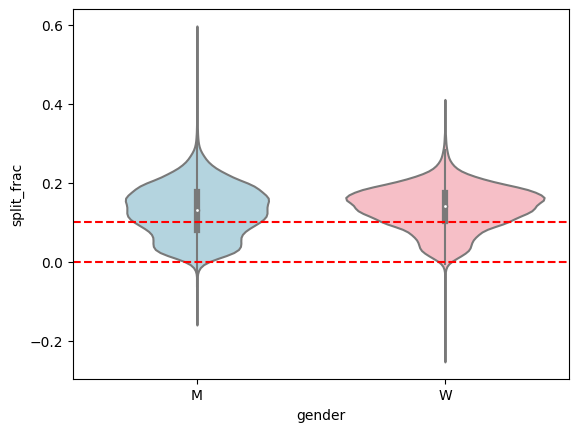

In [34]:
sns.violinplot(x='gender', y='split_frac', data=data, palette=['lightblue','lightpink'])
plt.axhline(0, color='r', linestyle='--')
plt.axhline(0.1, color='r', linestyle='--')
plt.show()

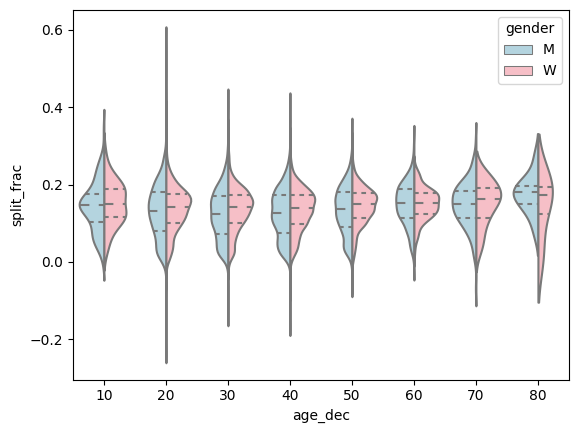

In [42]:
data['age_dec'] = data.age.map(lambda age: 10 * (age//10))
men = (data.gender=='M')
women = (data.gender=='W')

with sns.axes_style(style=None):
    sns.violinplot(x='age_dec', y='split_frac', hue='gender', data=data, split=True, inner='quartile', palette=['lightblue','lightpink'])

In [49]:
(data.age > 80).sum()

7

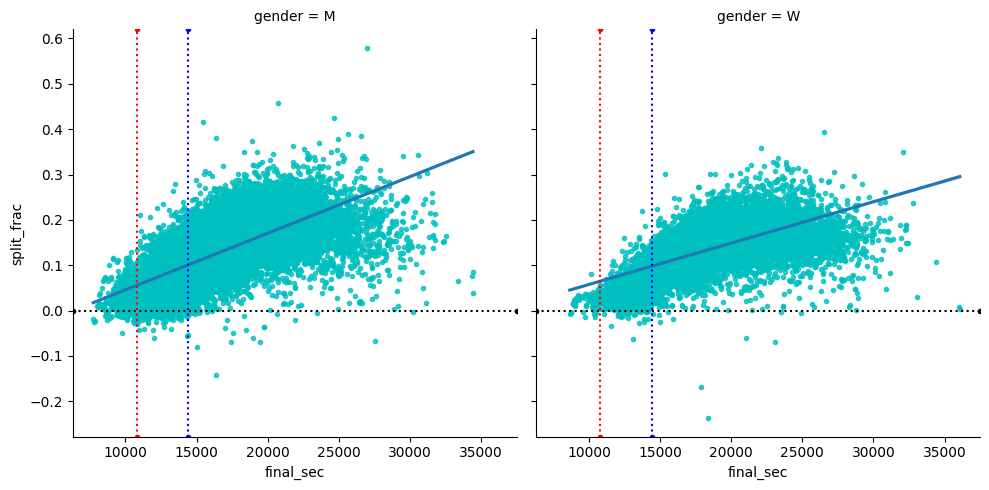

In [59]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data, markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0, linestyle=':', color='k')
g.map(plt.axvline, x=10800, linestyle=':', color='red')
g.map(plt.axvline, x=14400, linestyle=':', color='blue')